# MHBF - PT - WEEK4
David Mezey

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
from scipy import integrate, arange

This is what we have done during the preparational seminar:

In [2]:
def f_a(x,t):
    return -x

In [3]:
def euler(f_func, x_0, t):
    y=np.zeros(len(t))
    dt = t[1] - t[0]
    for i,ts in enumerate(t):
        if ts==0:
            y[i] = x_0
        else:
            y[i] = y[i-1] + dt*f_func(y[i-1], ts)    
    return y

And from here we have the homework:

## Exercise 1.)

### 1.1)

In [4]:
def laing_chow(y,t,I1,I2):
    #Setting default parameters
    alpha = .2
    betha = .4
    phi = .4
    tau = 20
    g1 = g2 = 1
    u1, a1, u2, a2 = y
    # defining diff eqs in the order of the previous line
    dydt = [-u1 + np.heaviside(alpha*g1*u1 - betha*g2*u2 - a1 + I1, 1), 
            1/tau * (-a1 + phi*np.heaviside(alpha*g1*u1 - betha*g2*u2 - a1 + I1, 1)),
           -u2 + np.heaviside(alpha*g2*u2 - betha*g1*u1 - a2 + I2, 1),
           1/tau * (-a2 + phi*np.heaviside(alpha*g2*u2 - betha*g1*u1 - a2 + I2, 1))]
    return dydt

In [5]:
#Setting parameters
y_null = np.array([1,.1,0,.25])
T = 500
dt = 0.01
t = np.arange(0,T+dt,dt)
I1 = 0.43
I2 = 0.5
# solving the equation system
sol = integrate.odeint(laing_chow, y_null, t, args=(I1,I2))

Text(0.5,1,'Activity and Adaptation of population 2')

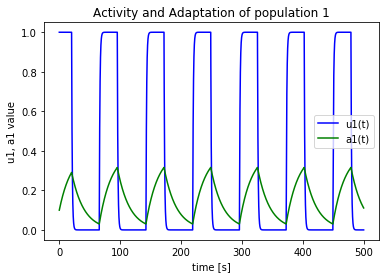

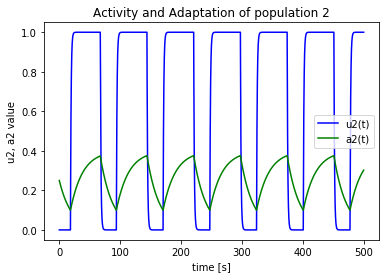

In [6]:
#Plotting the results:
plt.plot(t, sol[:, 0], 'b', label='u1(t)')
plt.plot(t, sol[:, 1], 'g', label='a1(t)')
plt.legend()
plt.xlabel('time [s]')
plt.ylabel('u1, a1 value')
plt.title('Activity and Adaptation of population 1')

plt.figure()
plt.plot(t, sol[:, 2], 'b', label='u2(t)')
plt.plot(t, sol[:, 3], 'g', label='a2(t)')
plt.legend()
plt.xlabel('time [s]')
plt.ylabel('u2, a2 value')
plt.title('Activity and Adaptation of population 2')

### 1.2)

In [7]:
def dominance_durations(u1,u2,t):
    dt = t[1]-t[0]
    u1_dom = np.heaviside(u1-u2,0)
    ch_indeces = np.where(np.roll(u1_dom,1)!=u1_dom)[0]
    chdiffs = np.diff(ch_indeces)
    start_from = u1_dom[0]
    if start_from == 1:
        if len(chdiffs)>1:
            u1domdurs =  chdiffs[0:-1:2]*dt
            u2domdurs =  chdiffs[1:-1:2]*dt
        else:
            if len(chdiffs)==1:
                u1domdurs =  chdiffs[0]*dt
                u2domdurs =  t[-1]-u1domdurs
            else:
                u1domdurs =  t[-1]
                u2domdurs =  0
    else:
        if len(chdiffs)>1:
            u2domdurs =  chdiffs[0:-1:2]*dt
            u1domdurs =  chdiffs[1:-1:2]*dt
        else:
            if len(chdiffs)==1:
                u2domdurs =  chdiffs[0]*dt
                u1domdurs =  t[-1]-u1domdurs
            else:
                u2domdurs =  t[-1]
                u1domdurs =  0
    return u1domdurs, u2domdurs

In [8]:
u1 = sol[:, 0]
u2 = sol[:, 2]

u1domdurs, u2domdurs = dominance_durations(u1,u2,t)
print('u1 dominance durations:',u1domdurs, '\nu2 dominance durations:', u2domdurs)
print('\nmean dominance durations (neglecting the first period):\nu1: ',np.mean(u1domdurs[1::]),'\nu2: ', np.mean(u2domdurs[1::]))

u1 dominance durations: [20.36 27.95 28.03 28.04 28.04 28.03] 
u2 dominance durations: [47.14 48.72 48.74 48.73 48.74 48.74]

mean dominance durations (neglecting the first period):
u1:  28.018 
u2:  48.734


Why is it different than in the paper?

Because in the paper Eq.9 takes into consideration Eq. 6 which we have not implemented in laing_chow()

### 1.3)

In [9]:
alpha = .2
betha = .4
phi = .4

middle = -alpha + betha + phi
print('critical value = ', middle)
radius = 1
res = 0.05
I1 = I2 = np.arange(0,middle+radius+res,res)
durations = np.zeros([2,len(I1),len(I2)])
#sols = np.zeros([2,len(I1), len(t)])

critical value =  0.6000000000000001


In [10]:
for i,i1 in enumerate(I1):
    for j,i2 in enumerate(I2):
        sol = integrate.odeint(laing_chow, y_null, t, args=(i1,i2))
        u1 = sol[:, 0]
        u2 = sol[:, 2]
        u1domdurs, u2domdurs = dominance_durations(u1,u2,t)
        durations[0,i,j] = np.mean(u1domdurs)
        durations[1,i,j] = np.mean(u2domdurs)
        #if i1==i2:
         #   sols[0,i,:]=u1
          #  sols[1,i,:]=u2

/home/lu/anaconda3/lib/python3.6/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


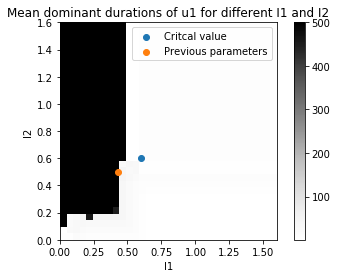

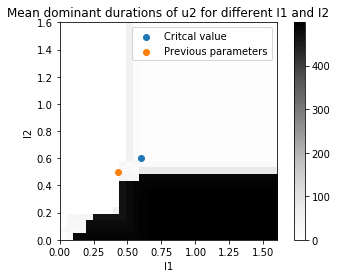

In [11]:
plt.imshow(durations[0,:,:], extent=[I1[0], I1[-1],I1[0],I1[-1]], cmap='Greys', origin="lower")
plt.colorbar()
plt.scatter(middle,middle, label='Critcal value')
plt.scatter(0.43,0.5, label='Previous parameters')
plt.xlabel('I1')
plt.ylabel('I2')
plt.title('Mean dominant durations of u1 for different I1 and I2')
plt.legend()

plt.figure()
plt.imshow(durations[1,:,:], extent=[I1[0], I1[-1],I1[0],I1[-1]], cmap='Greys', origin="lower")
plt.colorbar()
plt.scatter(middle,middle, label='Critcal value')
plt.scatter(0.43,0.5, label='Previous parameters')
plt.xlabel('I1')
plt.ylabel('I2')
plt.title('Mean dominant durations of u2 for different I1 and I2')
plt.legend()

As we can see as the input current is getting higher than the critical value for both populations both become active, go to 1 and since they are equal, there is no dominant duration for either of them. We can see that below the critical value there is a stripe of fluctuation, with these parameters the population activities will fluctuate and their mean dominant durations are therefore somewhat higher than zero. Below this treshold stripe either one of the populations will become active as the other will be fully inactive, therefore the dominant surations will be either close to the simulation time or zero. The 2 patterns in this case are complement of each other on the 2 meshgrids.

We also see that our previous parameters are in the fluctuation area.

## Exercise 2.)

### 2.1)

The odeint method is not suitable for this task because it can not handle stochastic differential equations.

### 2.2)

In [12]:
def euler_maruyama(f_func, g_func, x_0, t, *argv):
    y=np.zeros([len(x_0),len(t)])
    dt = t[1] - t[0]
    for i,ts in enumerate(t):
        if ts==0:
            y[:,i] = x_0
        else:
            y[:,i] = y[:,i-1] + np.array(f_func(y[:,i-1], ts, argv[0], argv[1]))*dt + np.sqrt(dt)*g_func(y[:,i-1], ts)*np.random.standard_normal(1)
    return y

In [13]:
#Setting parameters
y_null = np.array([1,.1,0,.25])
T = 500
dt = 0.01
t = np.arange(0,T+dt,dt)
I1 = 0.43
I2 = 0.5
# solving the equation system
sol = integrate.odeint(laing_chow, y_null, t, args=(I1,I2))

In [14]:
def g (x, t): return 0

sol = euler_maruyama(laing_chow, g, y_null, t, I1, I2)

Text(0.5,1,'Activity and Adaptation of population 2 (EM)')

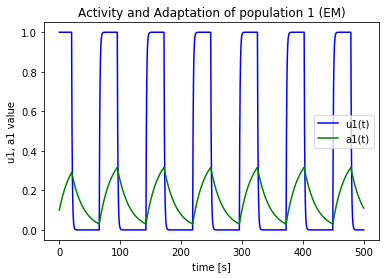

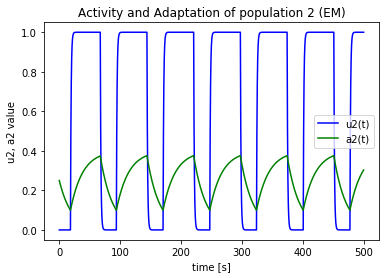

In [15]:
#Plotting the results:
plt.plot(t, sol[0, :], 'b', label='u1(t)')
plt.plot(t, sol[1, :], 'g', label='a1(t)')
plt.legend()
plt.xlabel('time [s]')
plt.ylabel('u1, a1 value')
plt.title('Activity and Adaptation of population 1 (EM)')

plt.figure()
plt.plot(t, sol[2, :], 'b', label='u2(t)')
plt.plot(t, sol[3, :], 'g', label='a2(t)')
plt.legend()
plt.xlabel('time [s]')
plt.ylabel('u2, a2 value')
plt.title('Activity and Adaptation of population 2 (EM)')

For g=0 we got back the original plots!

### 2.3)

In [16]:
def f1 (x, t, I1, I2): return 0
def f2 (x, t, I1, I2): return -x/0.1
def f3 (x, t, I1, I2): return -x
def g1 (x, t): return 1/0.1
def g2 (x, t): return 1

dt = 0.01
T=5
t = np.arange(0,T+dt,dt)

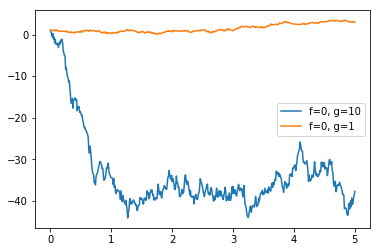

In [17]:
sol1 = euler_maruyama(f1, g1, y_null, t, I1, I2)
sol2 = euler_maruyama(f1, g2, y_null, t, I1, I2)

plt.figure()
plt.plot(t,sol1[0,:], label='f=0, g=10')
plt.plot(t,sol2[0,:], label='f=0, g=1')
plt.legend()

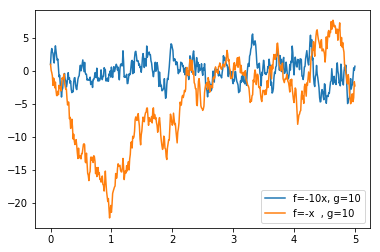

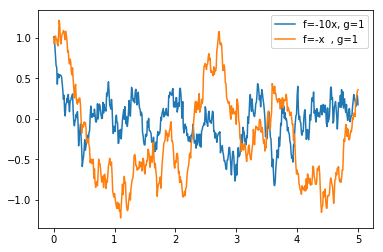

In [18]:
sol21 = euler_maruyama(f2, g1, y_null, t, I1, I2)
sol22 = euler_maruyama(f2, g2, y_null, t, I1, I2)
sol31 = euler_maruyama(f3, g1, y_null, t, I1, I2)
sol32 = euler_maruyama(f3, g2, y_null, t, I1, I2)

plt.figure()
plt.plot(t,sol21[0,:], label='f=-10x, g=10')
plt.plot(t,sol31[0,:], label='f=-x  , g=10')
plt.legend()

plt.figure()
plt.plot(t,sol22[0,:], label='f=-10x, g=1')
plt.plot(t,sol32[0,:], label='f=-x  , g=1')
plt.legend()


We can see on the graphs, that for f = -x the process tends to go further away from the original center as for f = -10x. The former case is called an Ornstein-Uhlenback procees, while the latter one is called a Wiener process, as it is corrected to go back to the original center. When the Wiener process is further away from the original center a bigger "force" acts on it to corrigate it back.

We can also see that the amplitude of the stochastic part g will tell us how big the fluctuation will be in the process as it will determine how strongly the random process will act on the base process. This can be easily noticed by the y scale of the graphs.

### 2.4)

In [19]:
def euler_maruyama_2(f_func, g_func, x_0, t, dt, *argv):
    print(argv)
    #adjusted to the next exercise
    y=np.zeros([len(x_0),len(t)])
    dt = t[1] - t[0]
    for i,ts in enumerate(t):
        if ts==0:
            y[:,i] = x_0
        else:
            if argv:
                y[:,i] = y[:,i-1] + np.array(f_func(y[:,i-1], ts, argv[0]))*dt + np.sqrt(dt)*g_func(y[:,i-1], ts)*np.random.standard_normal(1)
            else:
                y[:,i] = y[:,i-1] + np.array(f_func(y[:,i-1], ts))*dt + np.sqrt(dt)*g_func(y[:,i-1], ts)*np.random.standard_normal(1)
    return y

In [20]:
#NOTE: I have asked some help from Daniel Vargas, since my solution didn't really work. It turned out that I mixed up the order of the equations and also the r_pool equation. Now I am using a function which is similar of his function.

def sigmoid(x, theta = 0.1, k = 0.05):
    #B6 from article, sigmoidal fn
    return 1/(1+np.exp(-(x-theta)/k))

def f_moreno_bote(Y, t, gamma=0.1):
    #default values
    gA = gB = 0.05
    alpha=0.75
    beta=0.5
    phi = 0.5
    tau = 0.01
    tau_a = tau_b = 2
    tau_s = 0.1
    sigma = 0.03
    eta = 0.5
    theta = 0.1
    k = 0.05
    
    #B7 from article
    rXinh = lambda r_pool, rX: np.power((r_pool + eta * rX), 2)
    #B5 from article
    r_pool = lambda rA, rB: np.maximum((phi * (rA + rB) + gA + gB),0) #add linear threshold
    
    #getting the variable vector
    rA, rB, alpha_A, alpha_B, nA, nB = Y
    #calculating current rpool
    r_pool_ = r_pool(rA, rB)
    
    #return array of different in the prev order
    return np.array([(1 / tau) * (-rA + sigmoid(alpha*rA - beta*rXinh(r_pool_, rA) + gA - alpha_A + nA)),\
                     (1 / tau) * (-rB + sigmoid(alpha*rB - beta*rXinh(r_pool_, rB) + gB - alpha_B + nB)),\
                     (1 / tau_a)*(-alpha_A + gamma * rA),\
                     (1 / tau_b)*(-alpha_B + gamma * rB),\
                     (-nA / tau_s),\
                     (-nB / tau_s)
                    ])

def g_moreno_bote(Y,t):
    #Defining the stochastic part of the equations in the same order
    tau_s = 0.1
    sigma = 0.03
    return np.array([0,
                     0,
                     0,
                     0,
                     sigma*np.sqrt(2/tau_s),
                     sigma*np.sqrt(2/tau_s)
                     ])
    

In [21]:
#Initial conditions:
rA = 1
rB = 0.01
alpha_A = 0
alpha_B = 0.04
nA = nB = 0

x_0=np.array([rA,rB,alpha_A,alpha_B,nA,nB])

#Calculating the simulation
dt = 0.01
t = np.arange(0, 20, dt)
sol_mor= euler_maruyama_2(f_moreno_bote, g_moreno_bote, x_0, t, dt)

()


Text(0.5,0,'time [s]')

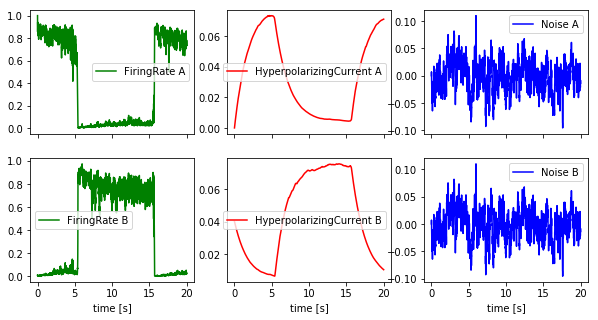

In [22]:
fig, ax = plt.subplots(2, 3, figsize =(10,5), sharex=True)

plt.axes(ax[0,0])
plt.plot(t, sol_mor[0,:], label='FiringRate A', c='green')
plt.legend()
plt.axes(ax[0,1])
plt.plot(t, sol_mor[2,:], label='HyperpolarizingCurrent A', c='red')
plt.legend()
plt.axes(ax[0,2])
plt.plot(t, sol_mor[4,:], label='Noise A', c='blue')
plt.legend()

plt.axes(ax[1,0])
ax[1,0].plot(t, sol_mor[1,:], label='FiringRate B', c='green')
plt.legend()
plt.axes(ax[1,1])
ax[1,1].plot(t, sol_mor[3,:], label='HyperpolarizingCurrent B', c='red')
plt.legend()
plt.axes(ax[1,2])
ax[1,2].plot(t, sol_mor[5,:], label='Noise B', c='blue')
plt.legend()

ax[1,0].set_xlabel("time [s]")
ax[1,1].set_xlabel("time [s]")
ax[1,2].set_xlabel("time [s]")

### 2.5)

In [39]:
#Initial conditions:
rA = 1
rB = 0.01
alpha_A = 0
alpha_B = 0.04
nA = nB = 0

x_0=np.array([rA,rB,alpha_A,alpha_B,nA,nB])

#Calculating the simulation
dt = 0.01
T = 500
t = np.arange(0, 500, dt)
sol_mor= euler_maruyama_2(f_moreno_bote, g_moreno_bote, x_0, t, dt)

()


In [40]:
u1domdurs, u2domdurs = dominance_durations(sol_mor[0,:], sol_mor[1,:], t)

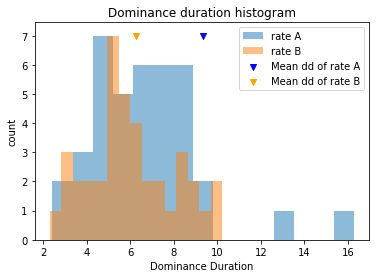

In [41]:
h = plt.hist(u1domdurs, bins=15, label='rate A', alpha=0.5)
plt.scatter(np.mean(h[1]),np.max(h[0]), label='Mean dd of rate A', c='blue', marker='v')
plt.title('Dominance duration histogram')

h = plt.hist(u2domdurs, bins=15, label='rate B', alpha=0.5)
plt.scatter(np.mean(h[1]),np.max(h[0]), label='Mean dd of rate B', c='orange', marker='v')
plt.xlabel('Dominance Duration')
plt.ylabel('count')
plt.legend()

In [26]:
#Initial conditions:
rA = 1
rB = 0.01
alpha_A = 0
alpha_B = 0.04
nA = nB = 0

x_0=np.array([rA,rB,alpha_A,alpha_B,nA,nB])

#Calculating the simulation
dt = 0.01
T = 500
t = np.arange(0, 500, dt)
sol_mor= euler_maruyama_2(f_moreno_bote, g_moreno_bote, x_0, t, dt, 0.5)

(0.5,)


In [27]:
u1domdurs, u2domdurs = dominance_durations(sol_mor[0,:], sol_mor[1,:], t)

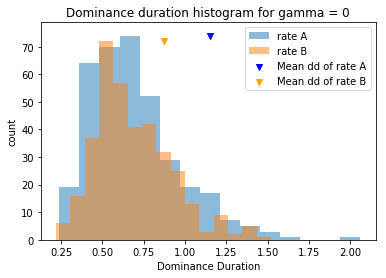

In [28]:
h = plt.hist(u1domdurs, bins=15, label='rate A', alpha=0.5)
plt.scatter(np.mean(h[1]),np.max(h[0]), label='Mean dd of rate A', c='blue', marker='v')
plt.title('Dominance duration histogram for gamma = 0')

h = plt.hist(u2domdurs, bins=15, label='rate B', alpha=0.5)
plt.scatter(np.mean(h[1]),np.max(h[0]), label='Mean dd of rate B', c='orange', marker='v')
plt.xlabel('Dominance Duration')
plt.ylabel('count')
plt.legend()

DOMINANCE DURATION HIST FOR GAMMA=0.5

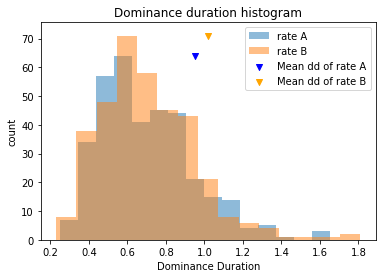

As we can see in the equations gamma parameter controls the hyperpolarizing currents. As the system gets zero hyperpolarizng current one of the populations will become active the other inactive.